# Authentication

In [140]:
import tweepy
from tweepy import OAuthHandler

consumer_key = "Ja0rkGIQ7q0eiuDOTG1Ioiifz"
consumer_secret = "0MpwoLJEXaGno5WUpJELxRtvX1BnYhQlnwGIN20KGxgCwmNO1G"
access_token = "1643196206661914627-chgan8lehEqN8PdQXKGMUzCJyknqpj"
access_token_secret = "WDEm5dmsK0EYyFhWICiOjvUK6XTrHUDjgR2ASNeusCdLZ"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [141]:
api.home_timeline()

[Status(_api=<tweepy.api.API object at 0x7f023548f4c0>, _json={'created_at': 'Wed Jun 28 15:04:51 +0000 2023', 'id': 1674071369309384707, 'id_str': '1674071369309384707', 'text': 'The first-ever edition of the Richard Mille Cup was a unique cocktail of classic sailing, timeless locations and sp… https://t.co/21NuwhfUVv', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/21NuwhfUVv', 'expanded_url': 'https://twitter.com/i/web/status/1674071369309384707', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 589103445, 'id_str': '589103445', 'name': 'Richard Mille', 'screen_name': 'Richard_Mille', 'location': '', 'description': 'A Racing Machine On T

# **Tweet Retrieval**

In [190]:
# ADD LIBRARY IMPORTS HERE
import csv
import json
import time
import datetime
import pytz

from google.colab import files

In [191]:
import nltk
import re
import string
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
sname="ROLEX"

In [193]:
custom_stopwords = stopwords.words('english')
stopwords_dict = Counter(custom_stopwords)

In [194]:
tmp = api.user_timeline(screen_name=sname, count=30)

# for t in tmp:
#   print(t.id, t.text)
tweets = [[t.id, t.created_at, t.text]for t in tmp]

# print("\nLatest tweet is indexed zero in array")
# print(tmp[0].created_at, tmp[0].text)
# print(tmp[7].created_at, tmp[7].text)
# print(tmp[-1].created_at, tmp[-1].text)

In [195]:
tweets

[[1673692751055994880,
  datetime.datetime(2023, 6, 27, 14, 0, 22, tzinfo=datetime.timezone.utc),
  'A watch’s autonomy is not just a promise, it is a pact that works both ways. Whether yours or its own, movement wil… https://t.co/RrPuxY7jGU'],
 [1673632297231237120,
  datetime.datetime(2023, 6, 27, 10, 0, 8, tzinfo=datetime.timezone.utc),
  'This year marks the 10th anniversary of the #RolexGrandSlam of Show Jumping. And no better place to begin celebrati… https://t.co/5aIyjKFpmW'],
 [1673300165921316870,
  datetime.datetime(2023, 6, 26, 12, 0, 22, tzinfo=datetime.timezone.utc),
  'As a @MissionBlue Hope Spot Champion, Sandra Bessudo’s goal is to conserve the marine ecosystems around Malpelo Isl… https://t.co/KObOgUuJfM'],
 [1672877299396407296,
  datetime.datetime(2023, 6, 25, 8, 0, 3, tzinfo=datetime.timezone.utc),
  'At this week’s Lindau Nobel Laureate Meeting, #RolexAwards for Enterprise winner Grégoire Courtine and Nobel Laurea… https://t.co/tBwm1MA43k'],
 [1671843083539959811,


In [197]:
tweets_json = []

In [199]:
# FUNCTION FOR BULK TWEET COLLECTION
stopdate = datetime.datetime(2023,6,20,0,0,0,0,pytz.UTC)
def queryTimeline():
  tmp = api.user_timeline(screen_name = sname, count=30)
  for t in tmp:
    tweets_json.append(t)

  while(tmp[-1].created_at > stopdate):
    time.sleep(3)
    print("Retrieving next batch of tweets")
    tmp = api.user_timeline(screen_name=sname, count=30, max_id=tmp[-1].id-1)
    for t in tmp:
      tweets_json.append(t)

queryTimeline()

In [201]:
# FUNCTION TO WRITE RETRIEVED STATUSES TO JSON FILE
with open(f"{sname}_tweets.json", "w") as f:
  for t in tweets_json:
    f.write(json.dumps(t._json) + "\n")

In [163]:
tweets_df = pd.DataFrame(tweets,
                  columns=['id',
                          'created_at',
                          'text'])

In [164]:
tweets_df

,id,created_at,text
0,1673692751055994880,2023-06-27 14:00:22+00:00,"A watch’s autonomy is not just a promise, it i..."
1,1673632297231237120,2023-06-27 10:00:08+00:00,This year marks the 10th anniversary of the #R...
2,1673300165921316870,2023-06-26 12:00:22+00:00,"As a @MissionBlue Hope Spot Champion, Sandra B..."
3,1672877299396407296,2023-06-25 08:00:03+00:00,"At this week’s Lindau Nobel Laureate Meeting, ..."
4,1671843083539959811,2023-06-22 11:30:27+00:00,The waters around Malpelo Island in the Pacifi...
5,1671155969236299778,2023-06-20 14:00:06+00:00,"'Werther', Massenet's great opera of passion, ..."
6,1670808740713431042,2023-06-19 15:00:20+00:00,"Whatever the conditions, the #Submariner’s Cer..."
7,1670612659127873538,2023-06-19 02:01:11+00:00,We thank the @usopengolf for bringing us anoth...
8,1669797104322002945,2023-06-16 20:00:27+00:00,Season 4 of @SailGP starts today in Chicago wi...
9,1669706485440413696,2023-06-16 14:00:22+00:00,The Paraflex bends to disperse energy before r...


In [175]:
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'http\S+', '', text, flags = re.MULTILINE)
    text = re.sub('\w*\d\w*', '', text)
    #text = ' '.join([word for word in text.split() if word not in stopwords_dict])

    return text

cleaned = lambda x: text_clean(x)

In [176]:
tweets_df['cleaned'] = pd.DataFrame(tweets_df.text.apply(cleaned))

In [177]:
tweets_df

,id,created_at,text,cleaned
0,1673692751055994880,2023-06-27 14:00:22+00:00,"A watch’s autonomy is not just a promise, it i...",a watch’s autonomy is not just a promise it is...
1,1673632297231237120,2023-06-27 10:00:08+00:00,This year marks the 10th anniversary of the #R...,this year marks the anniversary of the rolexg...
2,1673300165921316870,2023-06-26 12:00:22+00:00,"As a @MissionBlue Hope Spot Champion, Sandra B...",as a missionblue hope spot champion sandra bes...
3,1672877299396407296,2023-06-25 08:00:03+00:00,"At this week’s Lindau Nobel Laureate Meeting, ...",at this week’s lindau nobel laureate meeting r...
4,1671843083539959811,2023-06-22 11:30:27+00:00,The waters around Malpelo Island in the Pacifi...,the waters around malpelo island in the pacifi...
5,1671155969236299778,2023-06-20 14:00:06+00:00,"'Werther', Massenet's great opera of passion, ...",werther massenets great opera of passion premi...
6,1670808740713431042,2023-06-19 15:00:20+00:00,"Whatever the conditions, the #Submariner’s Cer...",whatever the conditions the submariner’s cerac...
7,1670612659127873538,2023-06-19 02:01:11+00:00,We thank the @usopengolf for bringing us anoth...,we thank the usopengolf for bringing us anothe...
8,1669797104322002945,2023-06-16 20:00:27+00:00,Season 4 of @SailGP starts today in Chicago wi...,season of sailgp starts today in chicago with...
9,1669706485440413696,2023-06-16 14:00:22+00:00,The Paraflex bends to disperse energy before r...,the paraflex bends to disperse energy before r...


In [178]:
tweets_df.to_csv(f'{sname}_tweets.csv', index = False)

# Social Media Metrics

Based on the SMC, you already have some points of the compass covered - the first function focuses on audience profile (details) and audience size

In [180]:
# FUNCTION TO COLLECT STATUSES USING CURSOR OBJECT
from tweepy import Cursor

In [181]:
# learn the difference between friends and followers on Twitter

username = "ROLEX"

def getAudienceProfile():
  result = api.get_user(screen_name=username)
  print(json.dumps(result._json, indent=3))

getAudienceProfile()

# =============================================================

def getFriends():
  with open("friends.json","w") as f:
    for page in Cursor (api.get_friends, screen_name=username, count=10).pages(15):
      print("Retrieving 10 friends info")
      time.sleep(2)
      for friend in page:
        f.write(json.dumps(friend._json)+"\n")


getFriends()

# =============================================================

def getFollowers():
  with open("followers.json","w") as f:
    for page in Cursor (api.get_followers, screen_name=username).pages(6):
      print("Retrieving 20 followers info")
      time.sleep(2)
      for follower in page:
        f.write(json.dumps(follower._json)+"\n")

getFollowers()

{
   "id": 494027712,
   "id_str": "494027712",
   "name": "ROLEX",
   "screen_name": "ROLEX",
   "location": "Geneva, Switzerland",
   "profile_location": null,
   "description": "Capturing moments in time, inspiring people to see the world through a new lens. Discover our latest stories.",
   "url": "https://t.co/lrVkllZyMm",
   "entities": {
      "url": {
         "urls": [
            {
               "url": "https://t.co/lrVkllZyMm",
               "expanded_url": "http://www.rolex.com",
               "display_url": "rolex.com",
               "indices": [
                  0,
                  23
               ]
            }
         ]
      },
      "description": {
         "urls": []
      }
   },
   "protected": false,
   "followers_count": 902456,
   "friends_count": 222,
   "listed_count": 914,
   "created_at": "Thu Feb 16 12:59:18 +0000 2012",
   "favourites_count": 1,
   "utc_offset": null,
   "time_zone": null,
   "geo_enabled": false,
   "verified": false,
   "statu

In [182]:
with open("friends.json",'r') as f:
  for line in f:
    obj = json.loads(line)
    print(obj)

{'id': 63796828, 'id_str': '63796828', 'name': 'Twitter Verified', 'screen_name': 'verified', 'location': 'San Francisco', 'description': 'Individuals can get a blue checkmark with @TwitterBlue. \n\nOrganizations can sign up for Verified Organizations here: https://t.co/jcNo6uelhv', 'url': 'https://t.co/1VALMxnR5M', 'entities': {'url': {'urls': [{'url': 'https://t.co/1VALMxnR5M', 'expanded_url': 'https://verified.twitter.com/', 'display_url': 'verified.twitter.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/jcNo6uelhv', 'expanded_url': 'https://twitter.com/i/verified-orgs-signup', 'display_url': 'twitter.com/i/verified-org…', 'indices': [117, 140]}]}}, 'protected': False, 'followers_count': 4198375, 'friends_count': 0, 'listed_count': 9234, 'created_at': 'Fri Aug 07 18:41:45 +0000 2009', 'favourites_count': 508, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 2502, 'lang': None, 'status': {'created_at': 'Wed A

In [183]:
# SIMPLE FUNCTION TO CALCULATE USER PROFILE STATISTICS (i.e. AUDIENCE PROFILE)
def getProfStats():
  followers_file="followers.json"
  friends_file="friends.json"
  username="ROLEX"

  with open(followers_file) as f1, open(friends_file) as f2:
    followers = []
    for line in f1:
      obj = json.loads(line)
      followers.append(obj['screen_name'])

    friends =[]
    for line in f2:
      obj = json.loads(line)
      friends.append(obj['screen_name'])

   # COMPLETE THE STATEMENTS TO COUNT OVERLAPPING ENTRIES IN ARRAYS
    mutual_friends = [user for user in friends if user in followers]
    friends_not_following = [user for user in friends if user not in followers]
    followers_not_friending = [user for user in  followers if user not in friends]

    print("{} has {} friends".format(username, len(friends)))
    print("{} has {} followers".format(username, len(followers)))
    print("{} has {} mutual friends".format(username, len(mutual_friends)))
    print("{} friends are not following {}".format(len(friends_not_following),username))

getProfStats()

ROLEX has 150 friends
ROLEX has 120 followers
ROLEX has 0 mutual friends
150 friends are not following ROLEX


This next function shows an example of content analysis to figure out top X of Y type of measurements. There are other content analysis operations (some have their own category like sentiment analysis)

In [184]:
from collections import Counter

In [185]:
# GRAB ANY SINGLE TWEET FROM TWITTER ACCOUNT THAT USES HASHTAGS, EMOJI, ETC.
api.user_timeline(screen_name="ROLEX", count=1)

[Status(_api=<tweepy.api.API object at 0x7f023548f4c0>, _json={'created_at': 'Tue Jun 27 14:00:22 +0000 2023', 'id': 1673692751055994880, 'id_str': '1673692751055994880', 'text': 'A watch’s autonomy is not just a promise, it is a pact that works both ways. Whether yours or its own, movement wil… https://t.co/RrPuxY7jGU', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/RrPuxY7jGU', 'expanded_url': 'https://twitter.com/i/web/status/1673692751055994880', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 494027712, 'id_str': '494027712', 'name': 'ROLEX', 'screen_name': 'ROLEX', 'location': 'Geneva, Switzerland', 'description': 'Capturing moments in time, 

# **Hashtag Performance**

In [188]:
# using saved JSON files from user_timelines identify the top mentions and hashtags used
def getTags(tweet):
  entities = tweet.get('entities', {}) #from ach tweet, just extract entities portion
  hashtags = entities.get('hashtags', []) #from each entities, extract hashtags
  return[tag['text'] for tag in hashtags] #for each hastags return as an array

def getTopHashTags(user):
  results = api.user_timeline(screen_name=user, tweet_mode = 'extended', count=30)
  htags = Counter()
  for t in results:
    htags.update(getTags(t._json))
  for tag, count in htags.most_common(5):
    print(tag, count)

getTopHashTags('ROLEX')

def getMentions(tweet):
  entities = tweet.get('entities', {}) #from ach tweet, just extract entities portion
  mentions = entities.get('user_mentions', []) #from each entities, extract hashtags
  return[tag['screen_name'] for tag in mentions] #for each hastags return as an array

def getTopMentions():
  results = api.user_timeline(screen_name='ROLEX', tweet_mode = 'extended', count=30)
  users = Counter()
  for t in results:
    users.update(getMentions(t._json))
  for tag, count in users.most_common(5):
    print(tag, count)

getTopMentions()

Perpetual 19
Watchmaking 4
PerpetualPlanet 4
RolexFamily 4
LeMans24 3
MissionBlue 2
usopengolf 2
24hoursoflemans 2
rolandgarros 2
RoyalOperaHouse 1


Following function helps you identify number of likes per tweet then calculates the average for all the tweets collected

In [205]:
import statistics

fname = f"{sname}_tweets.json"
tweetid, favourite_count, retweet_count=[],[],[]
with open(fname) as f:
  # COMPLETE THE FUNCTION HERE
  for line in f:
    tweet = json.loads(line)
    tweetid.append(tweet['id'])
    favourite_count.append(tweet['favorite_count'])
    retweet_count.append(tweet['retweet_count'])

  print("Likes per tweet", round(statistics.mean(favourite_count)))
  print("Average retweet count: ", statistics.mean(retweet_count))

Likes per tweet 480
Average retweet count:  59.53333333333333


Final function here is to calculate the responsiveness of an account (i.e. the speed of replies when mentioned

In [206]:
result = api.search_tweets("@ROLEX", count=30)
reply = []
for twit in result:
  # COMPLETE THE FUNCTION HERE
  replies = api.search_tweets(twit.user.screen_name, count=30)
  for twat in replies:
    if(twat.in_reply_to_status_id == twit.id):
      print("Reply from Rolex to user")
      print(twit.text, " | ", twat.text)
      reply.append(twat.created_at - twit.created_at)
for times in reply:
  print("Interval between query and reply: " , times)

# Data Visualization

Next is a simple function to display word frequency distribution of data obtained. There are many other ways to display your data and this is explored if further detail in VIP and is not covered here.

In [207]:
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [208]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

In [209]:
import nltk
nltk.download('stopwords')
print(set(stopwords.words('english')))

{"wouldn't", "that'll", 'same', 'at', 's', 'during', "you're", 'did', 'been', 'they', 'while', 'by', 'should', 'm', 'those', 'an', 'can', 'or', 'haven', 'for', 'them', 'theirs', 'who', 'the', 'am', "hasn't", 'so', 'more', 'it', 'here', 'be', 'a', 'isn', 'itself', 'when', 'you', 'hers', 'because', "should've", 'are', 'wasn', 'd', 'will', "isn't", 'there', "doesn't", "you've", 'my', 'he', 'won', 'from', 'doing', "couldn't", 'all', 'yourself', 'i', "it's", "shan't", 'this', 'having', 'is', 'o', 'that', 'above', 'any', 'doesn', 'myself', 'once', 'which', 'll', 'shouldn', 'their', "you'll", 'only', 'mightn', 'have', 'ain', 't', 'y', "shouldn't", "won't", 'has', 'below', 'aren', 'until', 'don', 'were', 'its', 'nor', 'in', 'her', 'between', 'him', 'me', 'and', 'was', 'few', 'hasn', 'after', 'again', 'these', 'herself', 'own', 'ma', 'both', 'under', "weren't", 'out', 'ourselves', 'how', 'just', 'over', 'very', "mightn't", 'most', 'too', 'mustn', 're', "aren't", 'with', "didn't", "you'd", 'need

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[10, 6, 4, 3, 3, 3, 3, 3, 3, 3]
['today', 'rolex', 'anniversary', 'year', 'starts', 'grand', 'first', 'starting', 'arts', 'festival']
today: 10
rolex: 6
anniversary: 4
year: 3
starts: 3
grand: 3
first: 3
starting: 3
arts: 3
festival: 3
watch: 2
marks: 2
@missionblue: 2
hope: 2
spot: 2
champion: 2
sandra: 2
bessudo: 2
around: 2
malpelo: 2
nobel: 2
cerachrom: 2
bezel: 2
@usopengolf: 2
another: 2
iconic: 2
los: 2
season: 2
teams: 2
club: 2
–: 2
thanks: 2
de: 2
clay: 2
congratulations: 2
winning: 2
@rolandgarros: 2
exclusive: 2
test: 2
70th: 2
race: 2
concert: 2
highlight: 2
tournament: 2
start: 2
https://t.co/gfslcatrnj: 2
10am: 2
cest: 2
live: 2
autonomy: 1


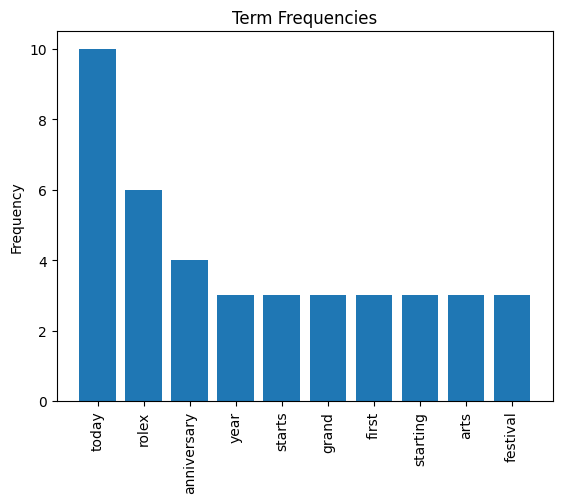

In [211]:
def createFD():
  tweet_tokenizer = TweetTokenizer()
  punct = list(string.punctuation)
  stopword_list = stopwords.words('english') + punct + ['…', 'rt', '’', '“']

  fname = f"{sname}_tweets.json"

  tf = Counter()
  with open(fname, 'r') as f:
      for line in f:
          tweet = json.loads(line)
          tokens = process(text=tweet.get('text', ''),
                            tokenizer=tweet_tokenizer,
                            stopwords=stopword_list)
          tf.update(tokens)

  y = [count for tag, count in tf.most_common(10)]
  print(y)

  terms = [t[0] for t in tf.most_common(10)]
  print(terms)

  x = range(1, len(y)+1)
  x_label = terms

  plt.bar(x, y, align='center')
  plt.xticks(x,x_label,rotation ='vertical')

  for tag, count in tf.most_common(50):
     print("{}: {}".format(tag, count))

  plt.title("Term Frequencies")
  plt.ylabel("Frequency")
  plt.savefig('term_distribution.png')
  plt.show()

createFD()